In [8]:
def read(path, switch_channels=True):
    image = cv2.imread(path)
    if switch_channels:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [9]:
def apply_kmeans(image, n_colors=16):
    # Convert to floats instead of the default 8 bits integer coding. Dividing by
    # 255 is important so that plt.imshow behaves works well on float data (need to
    # be in the range [0-1])
    image = np.array(image, dtype=np.float64) / 255

    # Load Image and transform to a 2D numpy array.
    w, h, d = image.shape
    assert d == 3
    image_array = np.reshape(image, (w * h, d))

    print("Fitting model on a small sub-sample of the data")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    print("done in %0.3fs." % (time() - t0))

    # Get labdels for all points
    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    print("done in %0.3fs." % (time() - t0))
    
    return labels, kmeans.cluster_centers_, w, h

In [10]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [17]:
n_colors = 3

image_path = 'shaggy.jpg'
image = read(image_path)  # load_sample_image("china.jpg")
labels, cluster_centers, w, h = apply_kmeans(image, n_colors=n_colors)
quant_image = recreate_image(cluster_centers, labels, w, h)

print(image.shape)

Fitting model on a small sub-sample of the data
done in 0.060s.
Predicting color indices on the full image (k-means)
done in 0.082s.
(600, 1080, 3)


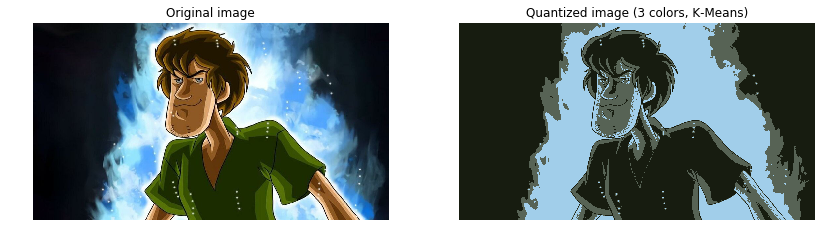

In [18]:
plt.figure(figsize=(14, 7))
plt.clf()
plt.axis('off')

plt.subplot(1, 2, 1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, interpolation='none')

plt.subplot(1, 2, 2)
plt.title('Quantized image ({} colors, K-Means)'.format(n_colors))
plt.axis('off')
plt.imshow(quant_image, interpolation='none')
plt.show()